In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data

## y = 20*xs + 12*zs + 7

In [2]:
observations = 1000

xs = np.random.uniform(-10,10,(observations,1))
zs = np.random.uniform(-10,10,(observations,1))
generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations,1))
generated_target = 20*xs + 12*zs + 7 + noise

np.savez('Pratice1', inputs=generated_inputs, target=generated_target)

## Model

In [3]:
training_data = np.load('Pratice1.npz')

In [4]:
output_size = 1
input_size = 2

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size, 
                   kernel_initializer=tf.random_uniform_initializer(-1,1),
                  bias_initializer=tf.random_uniform_initializer(-1,1))
])

## Objective functions Optimization 

In [5]:
learning_rate = 0.01

In [6]:
optimization = tf.keras.optimizers.SGD(learning_rate)

model.compile(optimization, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['target'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 685.2120 - 377ms/epoch - 12ms/step
Epoch 2/100
32/32 - 0s - loss: 9.8140 - 33ms/epoch - 1ms/step
Epoch 3/100
32/32 - 0s - loss: 2.9858 - 31ms/epoch - 962us/step
Epoch 4/100
32/32 - 0s - loss: 1.0868 - 35ms/epoch - 1ms/step
Epoch 5/100
32/32 - 0s - loss: 0.5558 - 32ms/epoch - 998us/step
Epoch 6/100
32/32 - 0s - loss: 0.4015 - 32ms/epoch - 991us/step
Epoch 7/100
32/32 - 0s - loss: 0.3682 - 32ms/epoch - 1ms/step
Epoch 8/100
32/32 - 0s - loss: 0.3545 - 30ms/epoch - 927us/step
Epoch 9/100
32/32 - 0s - loss: 0.3504 - 30ms/epoch - 943us/step
Epoch 10/100
32/32 - 0s - loss: 0.3548 - 27ms/epoch - 834us/step
Epoch 11/100
32/32 - 0s - loss: 0.3484 - 38ms/epoch - 1ms/step
Epoch 12/100
32/32 - 0s - loss: 0.3487 - 30ms/epoch - 934us/step
Epoch 13/100
32/32 - 0s - loss: 0.3593 - 37ms/epoch - 1ms/step
Epoch 14/100
32/32 - 0s - loss: 0.3513 - 32ms/epoch - 999us/step
Epoch 15/100
32/32 - 0s - loss: 0.3505 - 30ms/epoch - 935us/step
Epoch 16/100
32/32 - 0s - loss: 0.3553 - 3

## Checking weights and bias

In [7]:
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]

In [8]:
print('weight'+ str(weights))
print('bias' + str(bias))

weight[[19.964163]
 [11.965107]]
bias[6.998841]


## Prediction

In [11]:
outputs = model.predict_on_batch(training_data['inputs'])

## Plot the data

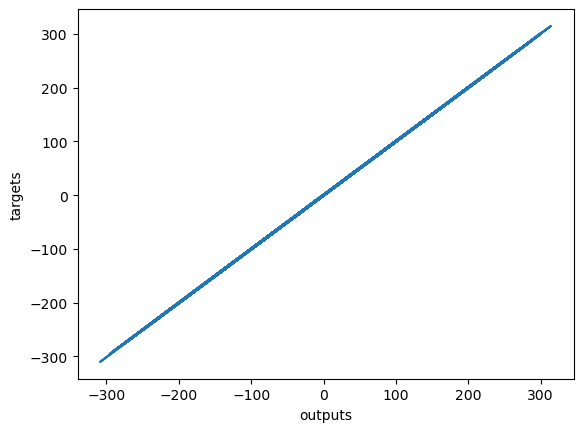

In [13]:
plt.plot(np.squeeze(outputs), np.squeeze(training_data['target']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()